In [137]:
# env: al
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [138]:
data_small = pd.read_csv('./data/bank+marketing/bank-additional/bank-additional/bank-additional.csv', sep=';')
data_small = data_small.convert_dtypes()
data_small.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.2,-42.0,4.191,5195.8,no


In [139]:
data_small['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: Int64

In [140]:
X_basic = data_small.drop('y', axis=1)
y_basic = data_small['y']

## Applying undersampling

In [141]:
from imblearn.under_sampling import RandomUnderSampler

In [142]:
# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X, y = undersampler.fit_resample(X_basic, y_basic)

In [143]:
y.value_counts()

y
no     451
yes    451
Name: count, dtype: Int64

## Applying oversampling

In [144]:
from imblearn.over_sampling import RandomOverSampler

In [145]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, y = oversampler.fit_resample(X_basic, y_basic)

In [146]:
y.value_counts()

y
no     3668
yes    3668
Name: count, dtype: Int64

## Preparing datasets

In [147]:
X.dtypes

age                        Int64
job               string[python]
marital           string[python]
education         string[python]
default           string[python]
housing           string[python]
loan              string[python]
contact           string[python]
month             string[python]
day_of_week       string[python]
duration                   Int64
campaign                   Int64
pdays                      Int64
previous                   Int64
poutcome          string[python]
emp.var.rate             Float64
cons.price.idx           Float64
cons.conf.idx            Float64
euribor3m                Float64
nr.employed              Float64
dtype: object

In [148]:
X_cats = X.select_dtypes(include='string')
X_cats = pd.get_dummies(X_cats) * 1

In [149]:
y_new = [1 if x == 'yes' else 0 for x in y]

In [150]:
X_final = pd.concat([X.select_dtypes(exclude='string'), X_cats], axis=1)
X_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.2,-42.0,4.191,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [151]:
X_final.shape

(7336, 63)

In [152]:
# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 1
np.random.seed(RANDOM_STATE_SEED)

plt_context = 'seaborn-v0_8'

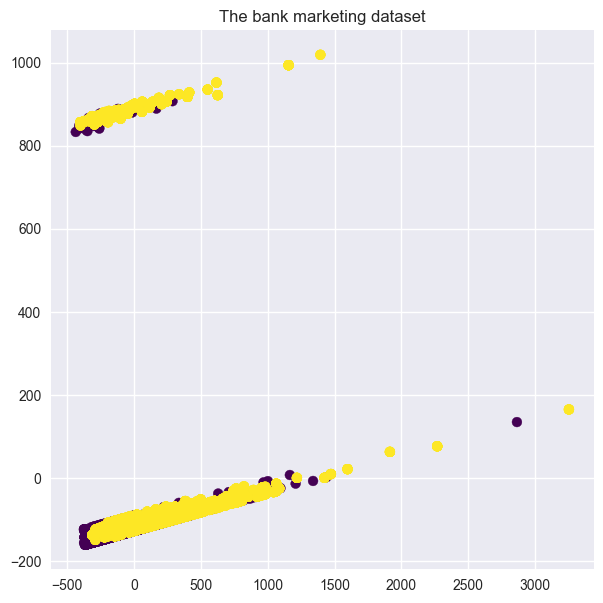

In [153]:
# visualizing the classes
with plt.style.context(plt_context):
    plt.figure(figsize=(7, 7))
    pca = PCA(n_components=2).fit_transform(X_final)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=y_new, cmap='viridis', s=50)
    plt.title('The bank marketing dataset')
    plt.show()

In [154]:
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner, Committee

In [155]:
X_pool = X_final.values
y_pool = np.array(y_new)

In [156]:
# initializing Committee members
n_members = 2
learner_list = list()

In [157]:
for member_idx in range(n_members):
    # initial training data
    n_initial = 2
    train_idx = np.random.choice(range(X_pool.shape[0]), size=n_initial, replace=False)
    X_train = X_pool[train_idx]
    y_train = y_pool[train_idx]

    # creating a reduced copy of the data with the known instances removed
    X_pool = np.delete(X_pool, train_idx, axis=0)
    y_pool = np.delete(y_pool, train_idx)

    # initializing learner
    learner = ActiveLearner(
        estimator=RandomForestClassifier(),
        X_training=X_train, y_training=y_train
    )
    learner_list.append(learner)

In [158]:
# assembling the committee
committee = Committee(learner_list=learner_list)

c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


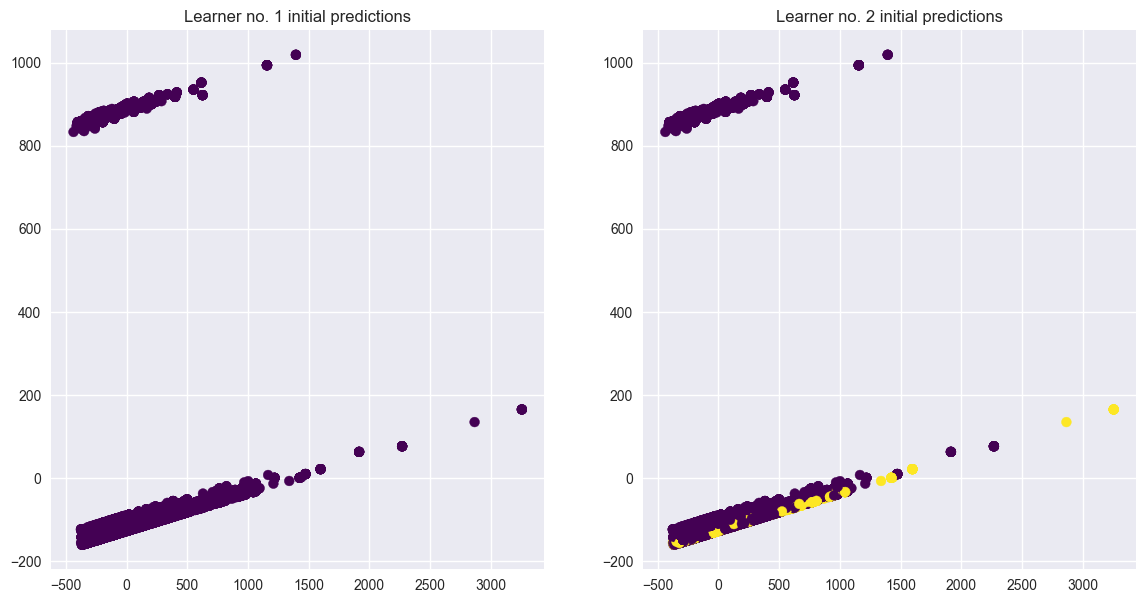

In [159]:
with plt.style.context(plt_context):
    plt.figure(figsize=(n_members*7, 7))
    for learner_idx, learner in enumerate(committee):
        plt.subplot(1, n_members, learner_idx + 1)
        plt.scatter(x=pca[:, 0], y=pca[:, 1], c=learner.predict(X_final), cmap='viridis', s=50)
        plt.title('Learner no. %d initial predictions' % (learner_idx + 1))
    plt.show()

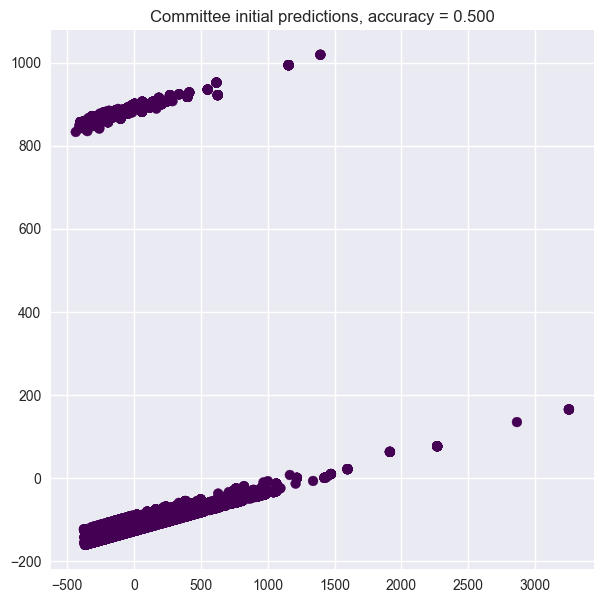

In [160]:
unqueried_score = committee.score(X_final.values, y_new)

with plt.style.context(plt_context):
    plt.figure(figsize=(7, 7))
    prediction = committee.predict(X_final.values)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Committee initial predictions, accuracy = %1.3f' % unqueried_score)
    plt.show()

## Active learning

In [161]:
performance_history = [unqueried_score]

# query by committee
n_queries = 50

for idx in range(n_queries):
    query_idx, query_instance = committee.query(X_pool)
    committee.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    performance_history.append(committee.score(X_final.values, y_new))
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)

## Reaching concensus

c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


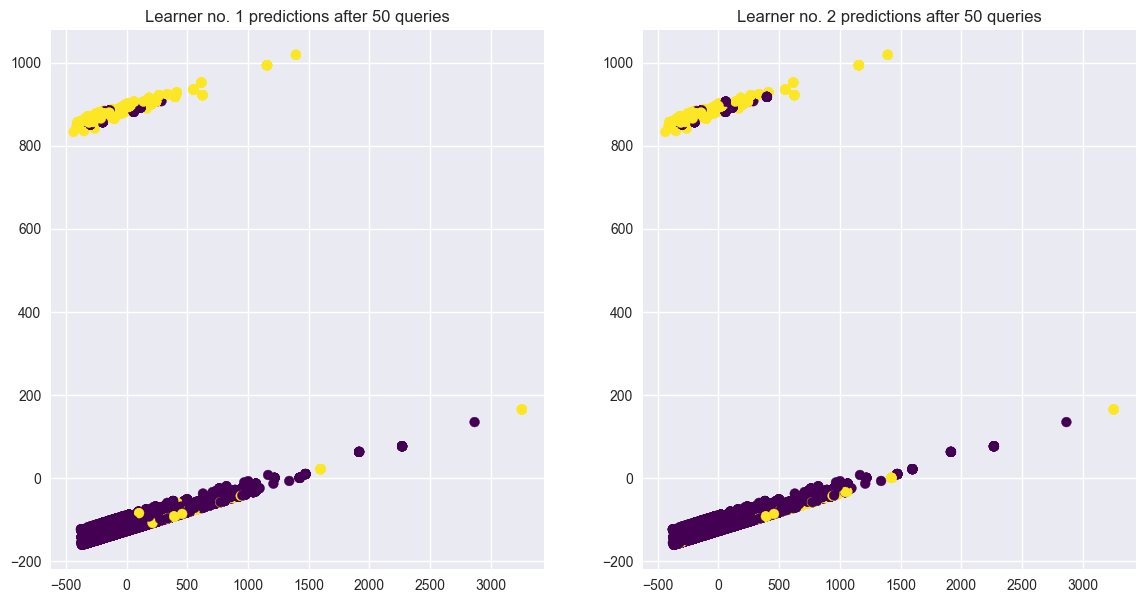

In [162]:
# visualizing the final predictions per learner
with plt.style.context(plt_context):
    plt.figure(figsize=(n_members*7, 7))
    for learner_idx, learner in enumerate(committee):
        plt.subplot(1, n_members, learner_idx + 1)
        plt.scatter(x=pca[:, 0], y=pca[:, 1], c=learner.predict(X_final), cmap='viridis', s=50)
        plt.title('Learner no. %d predictions after %d queries' % (learner_idx + 1, n_queries))
    plt.show()

c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\suilu\anaconda3\envs\al\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


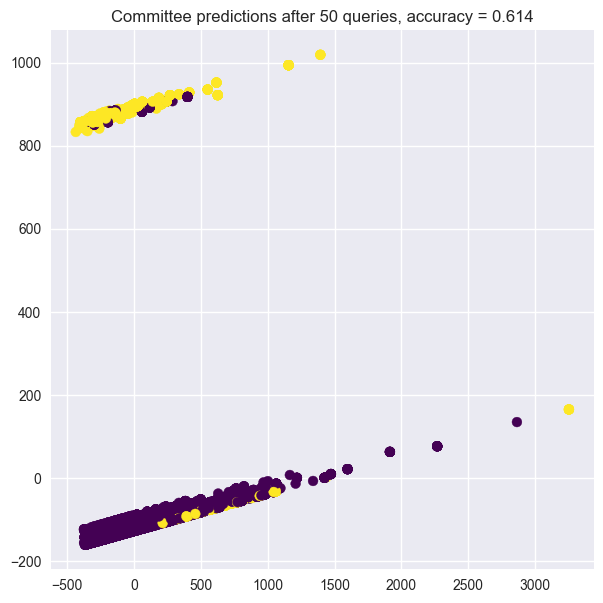

In [163]:
# visualizing the Committee's predictions
with plt.style.context(plt_context):
    plt.figure(figsize=(7, 7))
    prediction = committee.predict(X_final)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Committee predictions after %d queries, accuracy = %1.3f'
              % (n_queries, committee.score(X_final, y_new)))
    plt.show()

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
print(confusion_matrix(y_new, prediction))

[[3607   61]
 [2774  894]]


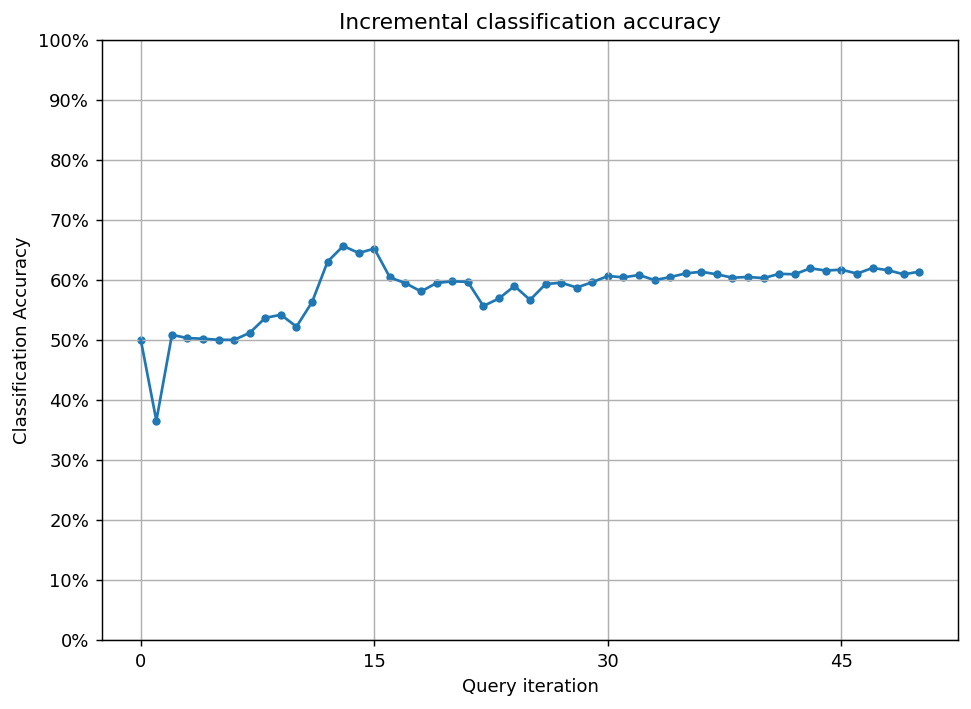

In [166]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()